# Confined Aquifer Test
**This test is taken from examples presented in MLU tutorial.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ttim

The test is condected at a fully confined two-aquifer system. Both the pumping well and the observation piezometer are screened at the second aquifer.

Set basic parameters:

In [2]:
Q = 82.08  # constant discharge in m^3/d
zt0 = -46  # top boundary of upper aquifer in m
zb0 = -49  # bottom boundary of upper aquifer in m
zt1 = -52  # top boundary of lower aquifer in m
zb1 = -55  # bottom boundary of lower aquifer in m
rw = 0.05  # well radius in m

Load data of two observation wells:

In [3]:
data1 = np.loadtxt("data/schroth_obs1.txt", skiprows=1)
t1 = data1[:, 0]
h1 = data1[:, 1]
r1 = 0
data2 = np.loadtxt("data/schroth_obs2.txt", skiprows=1)
t2 = data2[:, 0]
h2 = data2[:, 1]
r2 = 46  # distance between observation well2 and pumping well

Create single layer model (overlying aquifer and aquitard are excluded):

In [4]:
ml_0 = ttim.ModelMaq(z=[zt1, zb1], kaq=10, Saq=1e-4, tmin=1e-4, tmax=1)
w_0 = ttim.Well(ml_0, xw=0, yw=0, rw=rw, tsandQ=[(0, Q), (1e08, 0)])
ml_0.solve()

self.neq  1
solution complete


In [5]:
ca_0 = ttim.Calibrate(ml_0)
ca_0.set_parameter(name="kaq0", initial=10)
ca_0.set_parameter(name="Saq0", initial=1e-4)
ca_0.series(name="obs1", x=r1, y=0, t=t1, h=h1, layer=0)
ca_0.series(name="obs2", x=r2, y=0, t=t2, h=h2, layer=0)
ca_0.fit(report=True)

................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 109
    # data points      = 40
    # variables        = 2
    chi-square         = 111.249432
    reduced chi-square = 2.92761662
    Akaike info crit   = 44.9158143
    Bayesian info crit = 48.2935732
[[Variables]]
    kaq0:  1.03194176 +/- 0.10473587 (10.15%) (init = 10)
    Saq0:  0.04015834 +/- 0.02030818 (50.57%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.931


In [6]:
display(ca_0.parameters)
print("RMSE:", ca_0.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,1.03194,0.104736,10.1494,-inf,inf,10,[1.031941763294424]
Saq0,0.0401583,0.020308,50.5702,-inf,inf,0.0001,[0.04015834492968417]


RMSE: 1.6677037475808145


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


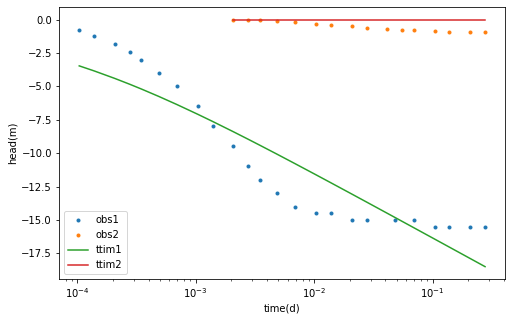

In [7]:
hm1_0 = ml_0.head(r1, 0, t1)
hm2_0 = ml_0.head(r2, 0, t2)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, ".", label="obs1")
plt.semilogx(t2, h2, ".", label="obs2")
plt.semilogx(t1, hm1_0[-1], label="ttim1")
plt.semilogx(t2, hm2_0[-1], label="ttim2")
plt.xlabel("time(d)")
plt.ylabel("head(m)")
plt.legend()
plt.savefig("C:/Users/DELL/Python Notebook/MT BE/Fig/schroth_one1.eps");

To improve model's performance, rc & res are adding:

In [8]:
ml_1 = ttim.ModelMaq(z=[zt1, zb1], kaq=10, Saq=1e-4, tmin=1e-4, tmax=1)
w_1 = ttim.Well(ml_1, xw=0, yw=0, rw=rw, rc=0, res=5, tsandQ=[(0, Q), (1e08, 0)])
ml_1.solve()

self.neq  1
solution complete


In [9]:
ca_1 = ttim.Calibrate(ml_1)
ca_1.set_parameter(name="kaq0", initial=10)
ca_1.set_parameter(name="Saq0", initial=1e-4)
ca_1.set_parameter_by_reference(name="rc", parameter=w_1.rc[:], initial=0.2)
ca_1.set_parameter_by_reference(name="res", parameter=w_1.res[:], initial=3)
ca_1.series(name="obs1", x=r1, y=0, t=t1, h=h1, layer=0)
ca_1.series(name="obs2", x=r2, y=0, t=t2, h=h2, layer=0)
ca_1.fit(report=True)

.....................................................................................................................................................................................................................................................................................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 402
    # data points      = 40
    # variables        = 4
    chi-square         = 13.6490004
    reduced chi-square = 0.37913890
    Akaike info crit   = -35.0085267
    Bayesian info crit = -28.2530089
[[Variables]]
    kaq0:  1.95212728 +/- 0.05269125 (2.70%) (init = 10)
    Saq0:  1.1462e-04 +/- 3.3116e-05 (28.89%) (init = 0.0001)
    rc:    0.00272166 +/- 0.02445717 (898.61%) (init = 0.2)
    res:   35.9712200 +/- 648.602536 (1803.12%) (init = 3)
[[Correlations]] (unreported correlations are

In [10]:
display(ca_1.parameters)
print("RMSE:", ca_1.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,1.95213,0.052691,2.69917,-inf,inf,10,[1.9521272762456596]
Saq0,0.000114615,0.000033,28.8936,-inf,inf,0.0001,[0.00011461547019049991]
rc,0.00272166,0.024457,898.614,-inf,inf,0.2,[0.0027216554033511415]
res,35.9712,648.602536,1803.12,-inf,inf,3,[35.97121995862126]


RMSE: 0.5841446816200618


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


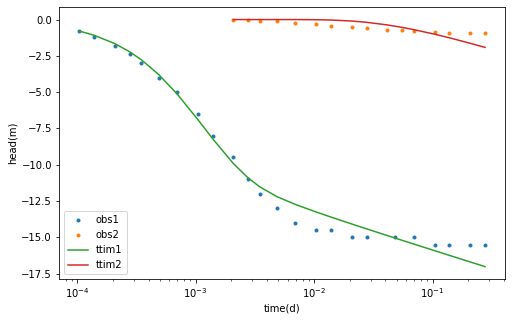

In [11]:
hm1_1 = ml_1.head(r1, 0, t1)
hm2_1 = ml_1.head(r2, 0, t2)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, ".", label="obs1")
plt.semilogx(t2, h2, ".", label="obs2")
plt.semilogx(t1, hm1_1[-1], label="ttim1")
plt.semilogx(t2, hm2_1[-1], label="ttim2")
plt.xlabel("time(d)")
plt.ylabel("head(m)")
plt.legend()
plt.savefig("C:/Users/DELL/Python Notebook/MT BE/Fig/schroth_one2.eps");

Create three-layer conceptual model:

In [12]:
ml_2 = ttim.ModelMaq(
    kaq=[17.28, 2],
    z=[zt0, zb0, zt1, zb1],
    c=200,
    Saq=[1.2e-4, 1e-5],
    Sll=3e-5,
    topboundary="conf",
    tmin=1e-4,
    tmax=0.5,
)
w_2 = ttim.Well(ml_2, xw=0, yw=0, rw=rw, tsandQ=[(0, Q), (1e08, 0)], layers=1)
ml_2.solve()

self.neq  1
solution complete


In [13]:
ca_2 = ttim.Calibrate(ml_2)
ca_2.set_parameter(name="kaq0", initial=20, pmin=0)
ca_2.set_parameter(name="kaq1", initial=1, pmin=0)
ca_2.set_parameter(name="Saq0", initial=1e-4, pmin=0)
ca_2.set_parameter(name="Saq1", initial=1e-5, pmin=0)
ca_2.set_parameter_by_reference(
    name="Sll", parameter=ml_2.aq.Sll[:], initial=1e-4, pmin=0
)
ca_2.set_parameter(name="c1", initial=100, pmin=0)
ca_2.series(name="obs1", x=r1, y=0, t=t1, h=h1, layer=1)
ca_2.series(name="obs2", x=r2, y=0, t=t2, h=h2, layer=1)
ca_2.fit(report=True)

.......................................................................................................................................................................................................................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 340
    # data points      = 40
    # variables        = 6
    chi-square         = 20.7597828
    reduced chi-square = 0.61058185
    Akaike info crit   = -14.2344744
    Bayesian info crit = -4.10119767
[[Variables]]
    kaq0:  7121.54738 +/- 4391140.16 (61659.92%) (init = 20)
    kaq1:  0.05228819 +/- 0.24082470 (460.57%) (init = 1)
    Saq0:  1.71840155 +/- 3299.14117 (191988.95%) (init = 0.0001)
    Saq1:  3.47007395 +/- 0.00372657 (0.11%) (init = 1e-05)
    Sll:   0.08926901 +/- 51.2204008 (57377.58%) (init = 0.0001)
    c1:    6.5485e-04 +/- 0.0036525

In [14]:
display(ca_2.parameters)
print("RMSE:", ca_2.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,7121.55,4.391140e+06,61659.9,0,inf,20,[7121.547379372198]
kaq1,0.0522882,2.408247e-01,460.572,0,inf,1,[0.052288192295638636]
Saq0,1.7184,3.299141e+03,191989,0,inf,0.0001,[1.718401550088255]
Saq1,3.47007,3.726568e-03,0.107392,0,inf,1e-05,[3.470073949617663]
Sll,0.089269,5.122040e+01,57377.6,0,inf,0.0001,"[0.0892690109689882, 0.0892690109689882]"
c1,0.000654851,3.652587e-03,557.774,0,inf,100,[0.0006548508260826313]


RMSE: 0.720412776980667


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


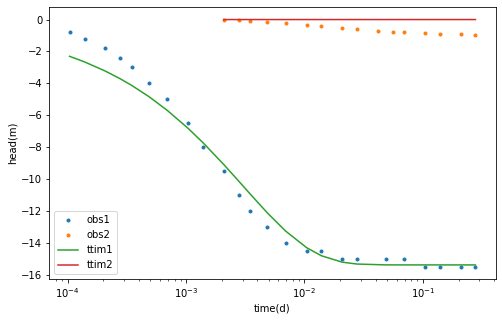

In [15]:
hm1_2 = ml_2.head(r1, 0, t1)
hm2_2 = ml_2.head(r2, 0, t2)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, ".", label="obs1")
plt.semilogx(t2, h2, ".", label="obs2")
plt.semilogx(t1, hm1_2[-1], label="ttim1")
plt.semilogx(t2, hm2_2[-1], label="ttim2")
plt.xlabel("time(d)")
plt.ylabel("head(m)")
plt.legend()
# plt.savefig("C:/Users/DELL/Python Notebook/MT BE/Fig/schroth_three1.eps");

Try adding res & rc:

In [16]:
ml_3 = ttim.ModelMaq(
    kaq=[19, 2],
    z=[zt0, zb0, zt1, zb1],
    c=200,
    Saq=[4e-4, 1e-5],
    Sll=1e-4,
    topboundary="conf",
    tmin=1e-4,
    tmax=0.5,
)
w_3 = ttim.Well(
    ml_3, xw=0, yw=0, rw=rw, rc=None, res=0, tsandQ=[(0, Q), (1e08, 0)], layers=1
)
ml_3.solve()

self.neq  1
solution complete


In [17]:
ca_3 = ttim.Calibrate(ml_3)
ca_3.set_parameter(name="kaq0", initial=20, pmin=0)
ca_3.set_parameter(name="kaq1", initial=1, pmin=0)
ca_3.set_parameter(name="Saq0", initial=1e-4, pmin=0)
ca_3.set_parameter(name="Saq1", initial=1e-5, pmin=0)
ca_3.set_parameter_by_reference(
    name="Sll", parameter=ml_3.aq.Sll[:], initial=1e-4, pmin=0
)
ca_3.set_parameter(name="c1", initial=100, pmin=0)
ca_3.set_parameter_by_reference(name="res", parameter=w_3.res[:], initial=0, pmin=0)
ca_3.set_parameter_by_reference(name="rc", parameter=w_3.rc[:], initial=0.2, pmin=0)
ca_3.series(name="obs1", x=r1, y=0, t=t1, h=h1, layer=1)
ca_3.series(name="obs2", x=r2, y=0, t=t2, h=h2, layer=1)
ca_3.fit(report=True)

............................................................................................................................................................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 281
    # data points      = 40
    # variables        = 8
    chi-square         = 1.31482276
    reduced chi-square = 0.04108821
    Akaike info crit   = -120.607103
    Bayesian info crit = -107.096068
[[Variables]]
    kaq0:  5.35396479 +/- 9.58019344 (178.94%) (init = 20)
    kaq1:  1.24301176 +/- 9.18218767 (738.70%) (init = 1)
    Saq0:  4.3148e-05 +/- 4.7634e-04 (1103.96%) (init = 0.0001)
    Saq1:  3.3501e-06 +/- 4.1173e-04 (12290.20%) (init = 1e-05)
    Sll:   2.0607e-06 +/- 1.4925e-04 (7242.43%) (init = 0.0001)
    c1:    0.68271013 +/- 39.8053513 (5830.49%) (init = 100)
    res:   9.4847e-06 +/- 0.027005

In [18]:
display(ca_3.parameters)
print("RMSE:", ca_3.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,5.35396,9.580193,178.936,0,inf,20,[5.353964789384363]
kaq1,1.24301,9.182188,738.705,0,inf,1,[1.2430117621749774]
Saq0,4.31484e-05,0.000476,1103.96,0,inf,0.0001,[4.314844196295908e-05]
Saq1,3.35008e-06,0.000412,12290.2,0,inf,1e-05,[3.3500846787770655e-06]
Sll,2.06071e-06,0.000149,7242.43,0,inf,0.0001,"[2.0607078541345913e-06, 2.0607078541345913e-06]"
c1,0.68271,39.805351,5830.49,0,inf,100,[0.6827101318045474]
res,9.48472e-06,0.027005,284723,0,inf,0,[9.484716873453536e-06]
rc,0.0554201,0.006902,12.4541,0,inf,0.2,[0.0554200877661315]


RMSE: 0.18130242391611345


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


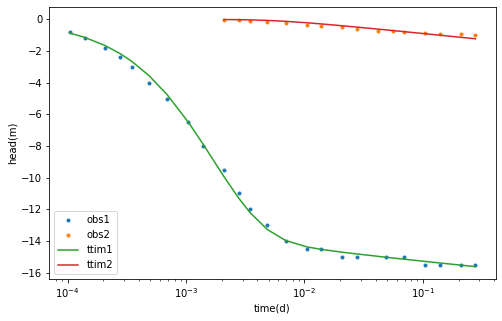

In [19]:
hm1_3 = ml_3.head(r1, 0, t1)
hm2_3 = ml_3.head(r2, 0, t2)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, ".", label="obs1")
plt.semilogx(t2, h2, ".", label="obs2")
plt.semilogx(t1, hm1_3[-1], label="ttim1")
plt.semilogx(t2, hm2_3[-1], label="ttim2")
plt.xlabel("time(d)")
plt.ylabel("head(m)")
plt.legend()
# plt.savefig("C:/Users/DELL/Python Notebook/MT BE/Fig/schroth_three2.eps");

Calibrate with fitted characters for upper aquifer:

In [25]:
ml_4 = ttim.ModelMaq(
    kaq=[17.28, 2],
    z=[zt0, zb0, zt1, zb1],
    c=200,
    Saq=[1.2e-4, 1e-5],
    Sll=3e-5,
    topboundary="conf",
    tmin=1e-4,
    tmax=0.5,
)
w_4 = ttim.Well(
    ml_4, xw=0, yw=0, rw=rw, rc=None, res=0, tsandQ=[(0, Q), (1e08, 0)], layers=1
)
ml_4.solve()

self.neq  1
solution complete


The optimized value of res is very close to the minimum limitation, thus res has little effect on the performance of the model. res is removed in this calibration.

In [26]:
ca_4 = ttim.Calibrate(ml_4)
ca_4.set_parameter(name="kaq1", initial=1, pmin=0)
ca_4.set_parameter(name="Saq1", initial=1e-5, pmin=0)
ca_4.set_parameter(name="c1", initial=100, pmin=0)
ca_4.set_parameter_by_reference(name="rc", parameter=w_4.rc[:], initial=0.2, pmin=0)
ca_4.series(name="obs1", x=r1, y=0, t=t1, h=h1, layer=1)
ca_4.series(name="obs2", x=r2, y=0, t=t2, h=h2, layer=1)
ca_4.fit(report=True)

.......................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 68
    # data points      = 40
    # variables        = 4
    chi-square         = 0.56419255
    reduced chi-square = 0.01567202
    Akaike info crit   = -162.449565
    Bayesian info crit = -155.694048
[[Variables]]
    kaq1:  1.93432822 +/- 0.01232555 (0.64%) (init = 1)
    Saq1:  1.3177e-05 +/- 2.3128e-06 (17.55%) (init = 1e-05)
    c1:    239.777472 +/- 20.5042386 (8.55%) (init = 100)
    rc:    0.05268634 +/- 4.0803e-04 (0.77%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq1, c1)   =  0.839
    C(Saq1, rc)   = -0.582
    C(kaq1, Saq1) = -0.503
    C(Saq1, c1)   = -0.214
    C(c1, rc)     = -0.111


In [27]:
display(ca_4.parameters)
print("RMSE:", ca_4.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq1,1.93433,0.012326,0.637201,0,inf,1,[1.9343282166578555]
Saq1,1.31765e-05,0.000002,17.5525,0,inf,1e-05,[1.3176530509806383e-05]
c1,239.777,20.504239,8.55136,0,inf,100,[239.7774720841064]
rc,0.0526863,0.000408,0.774453,0,inf,0.2,[0.05268634438990305]


RMSE: 0.11876368880039383


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


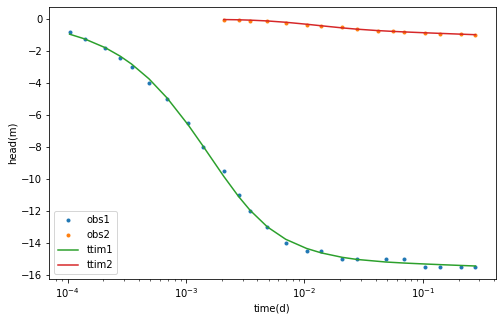

In [28]:
hm1_4 = ml_4.head(r1, 0, t1)
hm2_4 = ml_4.head(r2, 0, t2)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, ".", label="obs1")
plt.semilogx(t2, h2, ".", label="obs2")
plt.semilogx(t1, hm1_4[-1], label="ttim1")
plt.semilogx(t2, hm2_4[-1], label="ttim2")
plt.xlabel("time(d)")
plt.ylabel("head(m)")
plt.legend()
# plt.savefig("C:/Users/DELL/Python Notebook/MT BE/Fig/schroth_three3.eps");

## Summary of values simulated by MLU

Results of calibrations done with three-layer model of ttim are presented below.

In [35]:
t = pd.DataFrame(
    columns=[
        "k0[m/d]",
        "k1[m/d]",
        "Ss0[1/m]",
        "Ss1[1/m]",
        "Sll[1/m]",
        "c[d]",
        "res",
        "rc",
    ],
    index=["MLU", "MLU-fixed k1", "ttim", "ttim-rc", "ttim-fixed upper"],
)
t.loc["ttim-rc"] = ca_3.parameters["optimal"].values
t.iloc[2, 0:6] = ca_2.parameters["optimal"].values
t.iloc[4, 5] = ca_4.parameters["optimal"].values[2]
t.iloc[4, 7] = ca_4.parameters["optimal"].values[3]
t.iloc[4, 0] = 17.28
t.iloc[4, 1] = ca_4.parameters["optimal"].values[0]
t.iloc[4, 2] = 1.2e-4
t.iloc[4, 3] = ca_4.parameters["optimal"].values[1]
t.iloc[4, 4] = 3e-5
t.iloc[0, 0:6] = [17.424, 6.027e-05, 1.747, 6.473e-06, 3.997e-05, 216]
t.iloc[1, 0:6] = [2.020e-04, 9.110e-04, 3.456, 6.214e-05, 7.286e-05, 453.5]
t["RMSE"] = [0.023452, 0.162596, ca_2.rmse(), ca_3.rmse(), ca_4.rmse()]
t

,k0[m/d],k1[m/d],Ss0[1/m],Ss1[1/m],Sll[1/m],c[d],res,rc,RMSE
MLU,17.424,6.027e-05,1.747,6.473e-06,3.997e-05,216,NaN,NaN,0.023452
MLU-fixed k1,0.000202,0.000911,3.456,6.214e-05,7.286e-05,453.5,NaN,NaN,0.162596
ttim,7121.55,0.0522882,1.7184,3.47007,0.089269,0.000654851,NaN,NaN,0.720413
ttim-rc,5.35396,1.24301,4.31484e-05,3.35008e-06,2.06071e-06,0.68271,9.48472e-06,0.0554201,0.181302
ttim-fixed upper,17.28,1.93433,0.00012,1.31765e-05,3e-05,239.777,NaN,0.0526863,0.118764
